# Análisis Exploratorio de Datos

Juan Manuel Alvarado Sandoval

**Instrucciones:** De acuerdo con el siguiente set de datos que corresponde a los datos de las viviendas de California, realice un análisis exploratorio, identifique datos atípicos, realice limpieza y proponga dos modelos que predigan el costo de las viviendas. Y finalmente, elabore un reporte operativo y otro directivo con los hallazgos identificados.



Aquí nuesto objetivo será predecir median_house_value por lo que este es un problema de regresión. 
Comenzaremos el análisis exploratorio de datos de la siguiente forma: 
1. Descripción del dataset. 
2. Análisis Univariado
3. Análisis Bivariado
4. Conclusiones

**Posteriormente manejaré un script para la limpieza/preprocesado y otro para el modelo.**

### 1. Descripción del Dataset

In [3]:
import pandas as pd

dataset = pd.read_csv("../data/housing.csv")
df = pd.DataFrame(dataset, columns=dataset.columns)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Aquí notamos que tenemos:
Número de observaciones: ~20,640
Número de variables: 10
Variable objetivo: median_house_value

Todas son variables numéricas excepto ocean_proximity, la cual es categórica.
Se puede observar que el conteo en total_bedrooms es 20,433 y no 20,640, lo que significa que contiene 207 valores faltantes. 


In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### 2. Análisis Univariado

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
summary = df[numeric_cols].describe().T
summary["varianza"] = df[numeric_cols].var()
summary["asimetria"] = df[numeric_cols].skew()
summary["kurtosis"] = df[numeric_cols].kurt()
summary["coef_variacion"] = summary["std"] / summary["mean"]

print("Resumen estadístico univariado:")
display(summary)

Resumen estadístico univariado:


,count,mean,std,min,25%,50%,75%,max,varianza,asimetria,kurtosis,coef_variacion
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100,4.014139e+00,-0.297801,-1.330152,-0.016756
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500,4.562293e+00,0.465953,-1.117760,0.059945
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000,1.583963e+02,0.060331,-0.800629,0.439448
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000,4.759445e+06,4.147343,32.630927,0.827698
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000,1.775654e+05,3.459546,21.985575,0.783432
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000,1.282470e+06,4.935858,73.553116,0.794444
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000,1.461760e+05,3.410438,22.057988,0.765364
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001,3.609323e+00,1.646657,4.952524,0.490825
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000,1.331615e+10,0.977763,0.327870,0.557855


Análisis de variables numéricas: 

longitude: Distribución ligeramente simétrica, sin valores extremos relevantes; solo refleja ubicación geográfica.

latitude : Distribución centrada, ligera asimetría positiva; sin implicaciones problemáticas.

housing_median_age : Rango amplio (1–52), distribución casi simétrica.

total_rooms : Alta varianza y asimetría positiva, presencia de outliers; requiere transformación para modelos sensibles a escala.

total_bedrooms : Alta varianza, asimetría y curtosis elevadas; 207 valores faltantes, outliers significativos.

population : Muy dispersa y sesgada, con curtosis extrema; fuerte presencia de valores extremos.

households : Alta varianza y outliers; patrón similar a population y total_bedrooms.

median_income : Sesgada a la derecha, curtosis moderadamente alta.

median_house_value : Distribución truncada en 500,000 USD, posible censura superior.

Aquí grafico el histograma de las variables numéricas para visualizar la información y detectar patrones que no son tan faciles de ver en el método describe() en forma de tabla. 

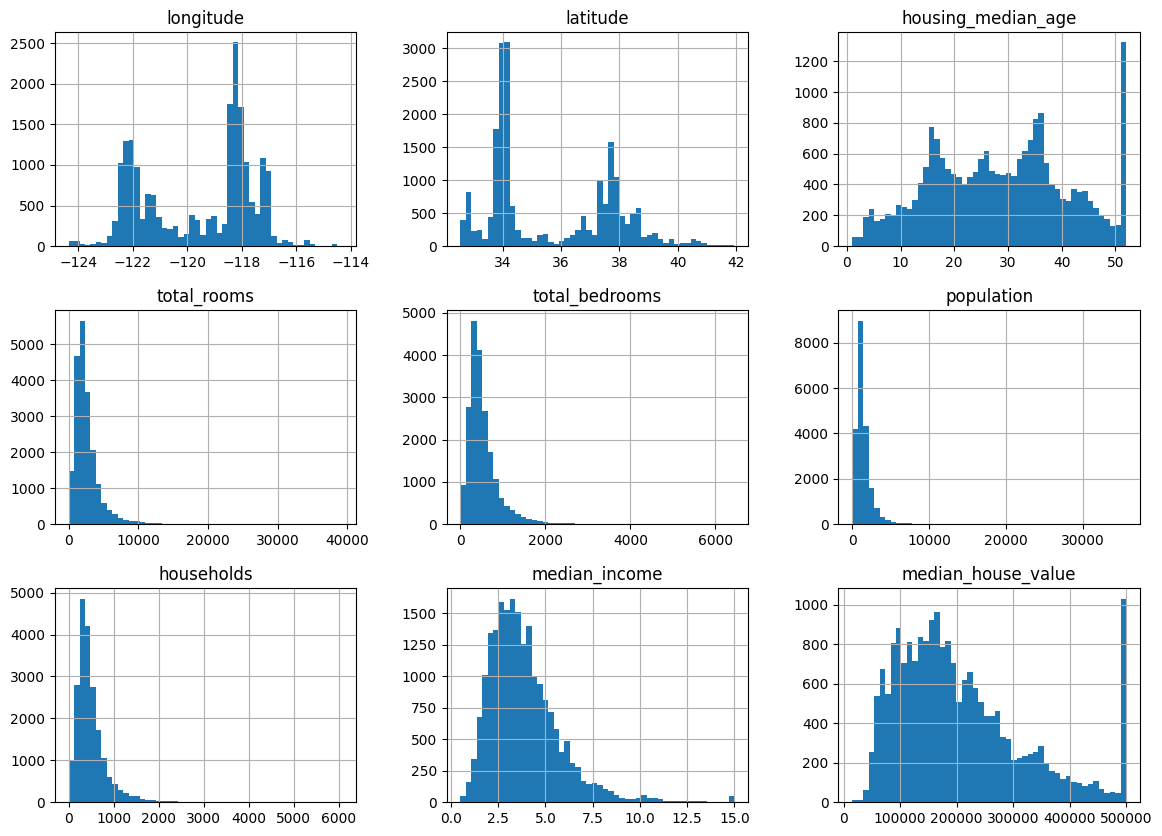

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(14,10))
plt.savefig("../screenshots/numerical_hist.png", dpi=300, bbox_inches="tight")

Al analizar la distribución de median_house_value, se observa un corte abrupto en 500,000 USD, acompañado de una 
concentración significativa de observaciones en ese valor. Esto sugiere que nuestra variable objetivo fue censurada y dicho comportamiento puede verificarse mediante: 
- El valor máximo del atributo
- Su frecuencia Inusualmente alta de muestras con ese valor
- La forma truncada del histograma
Esto puede inducir sesgo en el modelo, ya que el algoritmo puede aprender que los precios nunca superan ese umbral, afectando la generalización en regiones con alto valor inmobiliario.

Otro detalle es la asimetría positiva observada en variables como total_rooms, population y households indica presencia de valores extremos y concentración de masa en rangos bajos-medios. Este comportamiento puede afectar modelos sensibles a la escala y a la normalidad de los errores, como la regresión lineal, por lo que se evaluará la aplicación de transformaciones (ej. logarítmica) en etapas posteriores.

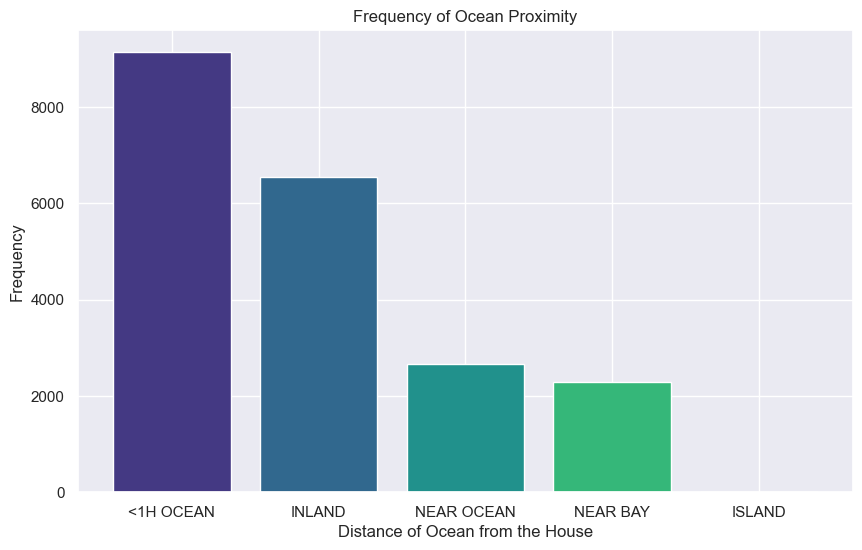

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("viridis", n_colors=dataset['ocean_proximity'].nunique())
counts = dataset['ocean_proximity'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color=palette)
plt.title("Frequency of Ocean Proximity")
plt.xlabel("Distance of Ocean from the House")
plt.ylabel("Frequency")
plt.show()


ocean_proximity : Variable categórica desbalanceada; ISLAND con muy pocos registros.

### Análisis Bivariado


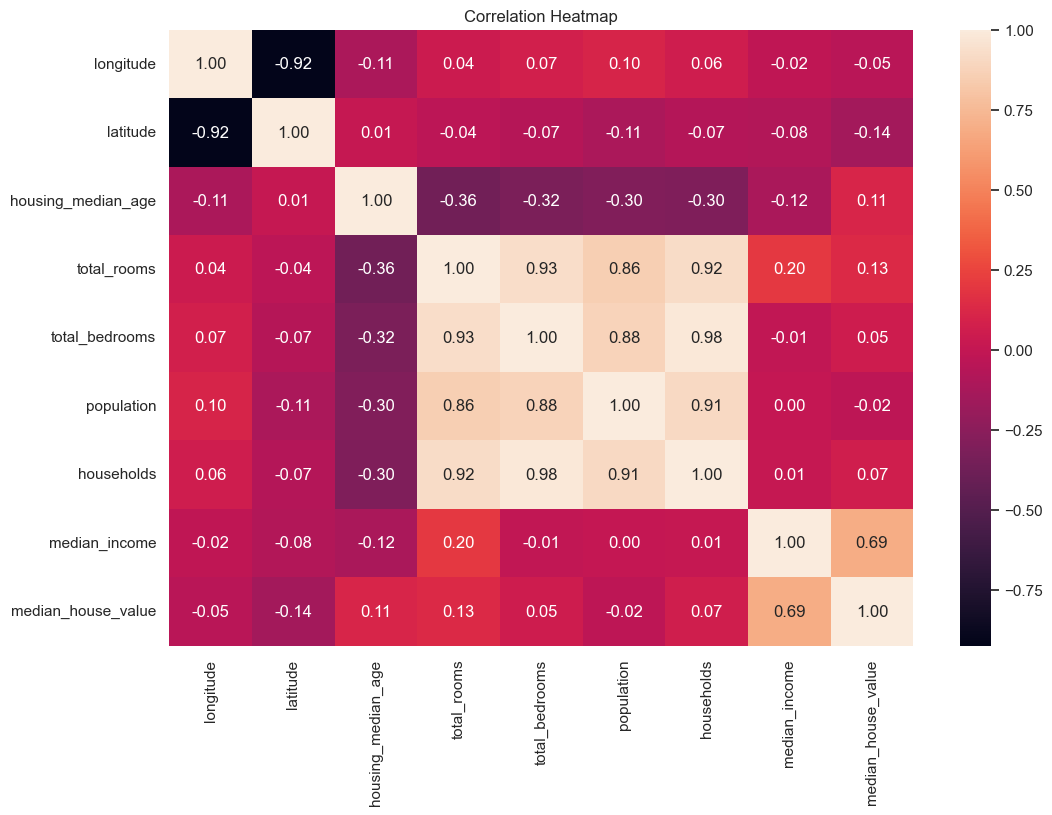

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
corr = numeric_cols.corr()
sns.set_theme(style="darkgrid")
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Primero calculamos una matriz de correlación como punto de partida del análisis bivariado, con el objetivo de identificar relaciones lineales entre variables numéricas y detectar posibles dependencias fuertes. 
Las altas correlaciones entre population, households, total_rooms y total_bedrooms se explican porque todas capturan el tamaño o escala de cada distrito, por lo que comparten información similar. 

Asimismo, la fuerte correlación entre median_income y median_house_value confirma que el ingreso mediano es un determinante clave del precio de la vivienda. La alta correlación entre latitude y longitude responde a la estructura geográfica del estado y no implica una relación causal, sino dependencia espacial.

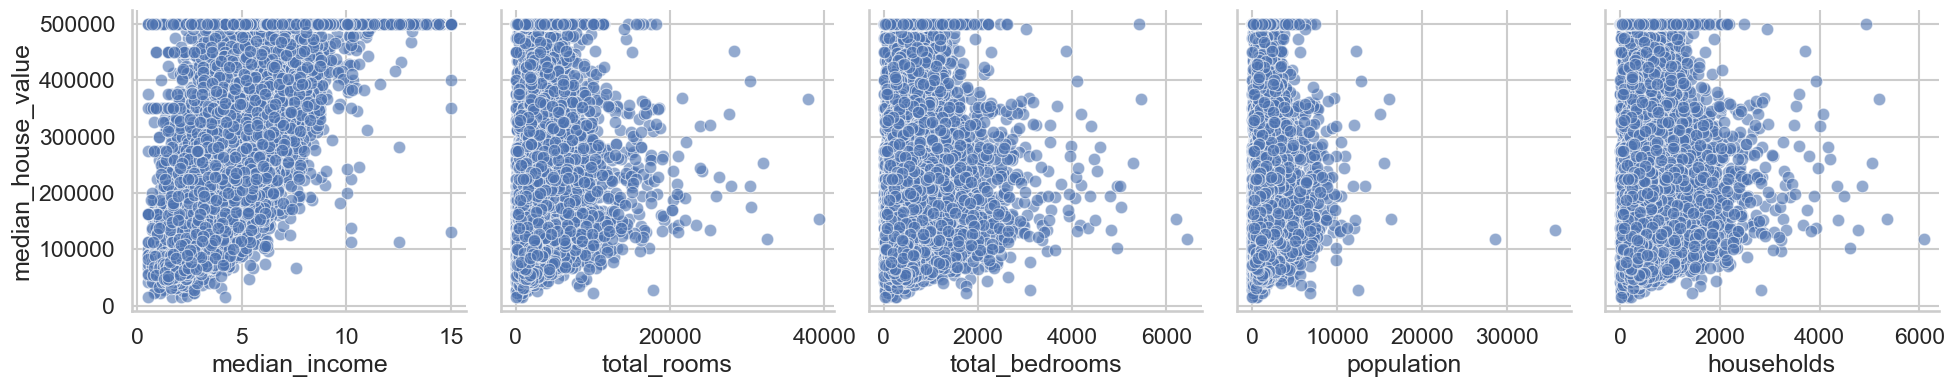

In [59]:
import seaborn as sns

alertas = ['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']

sns.pairplot(df[alertas], x_vars=alertas[:-1], y_vars='median_house_value', height=4, kind='scatter', plot_kws={'alpha':0.6})

Posteriormente, utilizamos un pairplot enfocado en las variables de alerta identificadas previamente, ya que estas mostraron relaciones relevantes o potencialmente problemáticas en la matriz de correlación. 

En particular, median_income muestra una relación creciente clara con median_house_value, mientras que variables como total_rooms, total_bedrooms o population presentan alta variabilidad respecto al precio, lo que sugiere que sus valores absolutos pueden no ser tan informativos sin algún tipo de normalización o transformación.

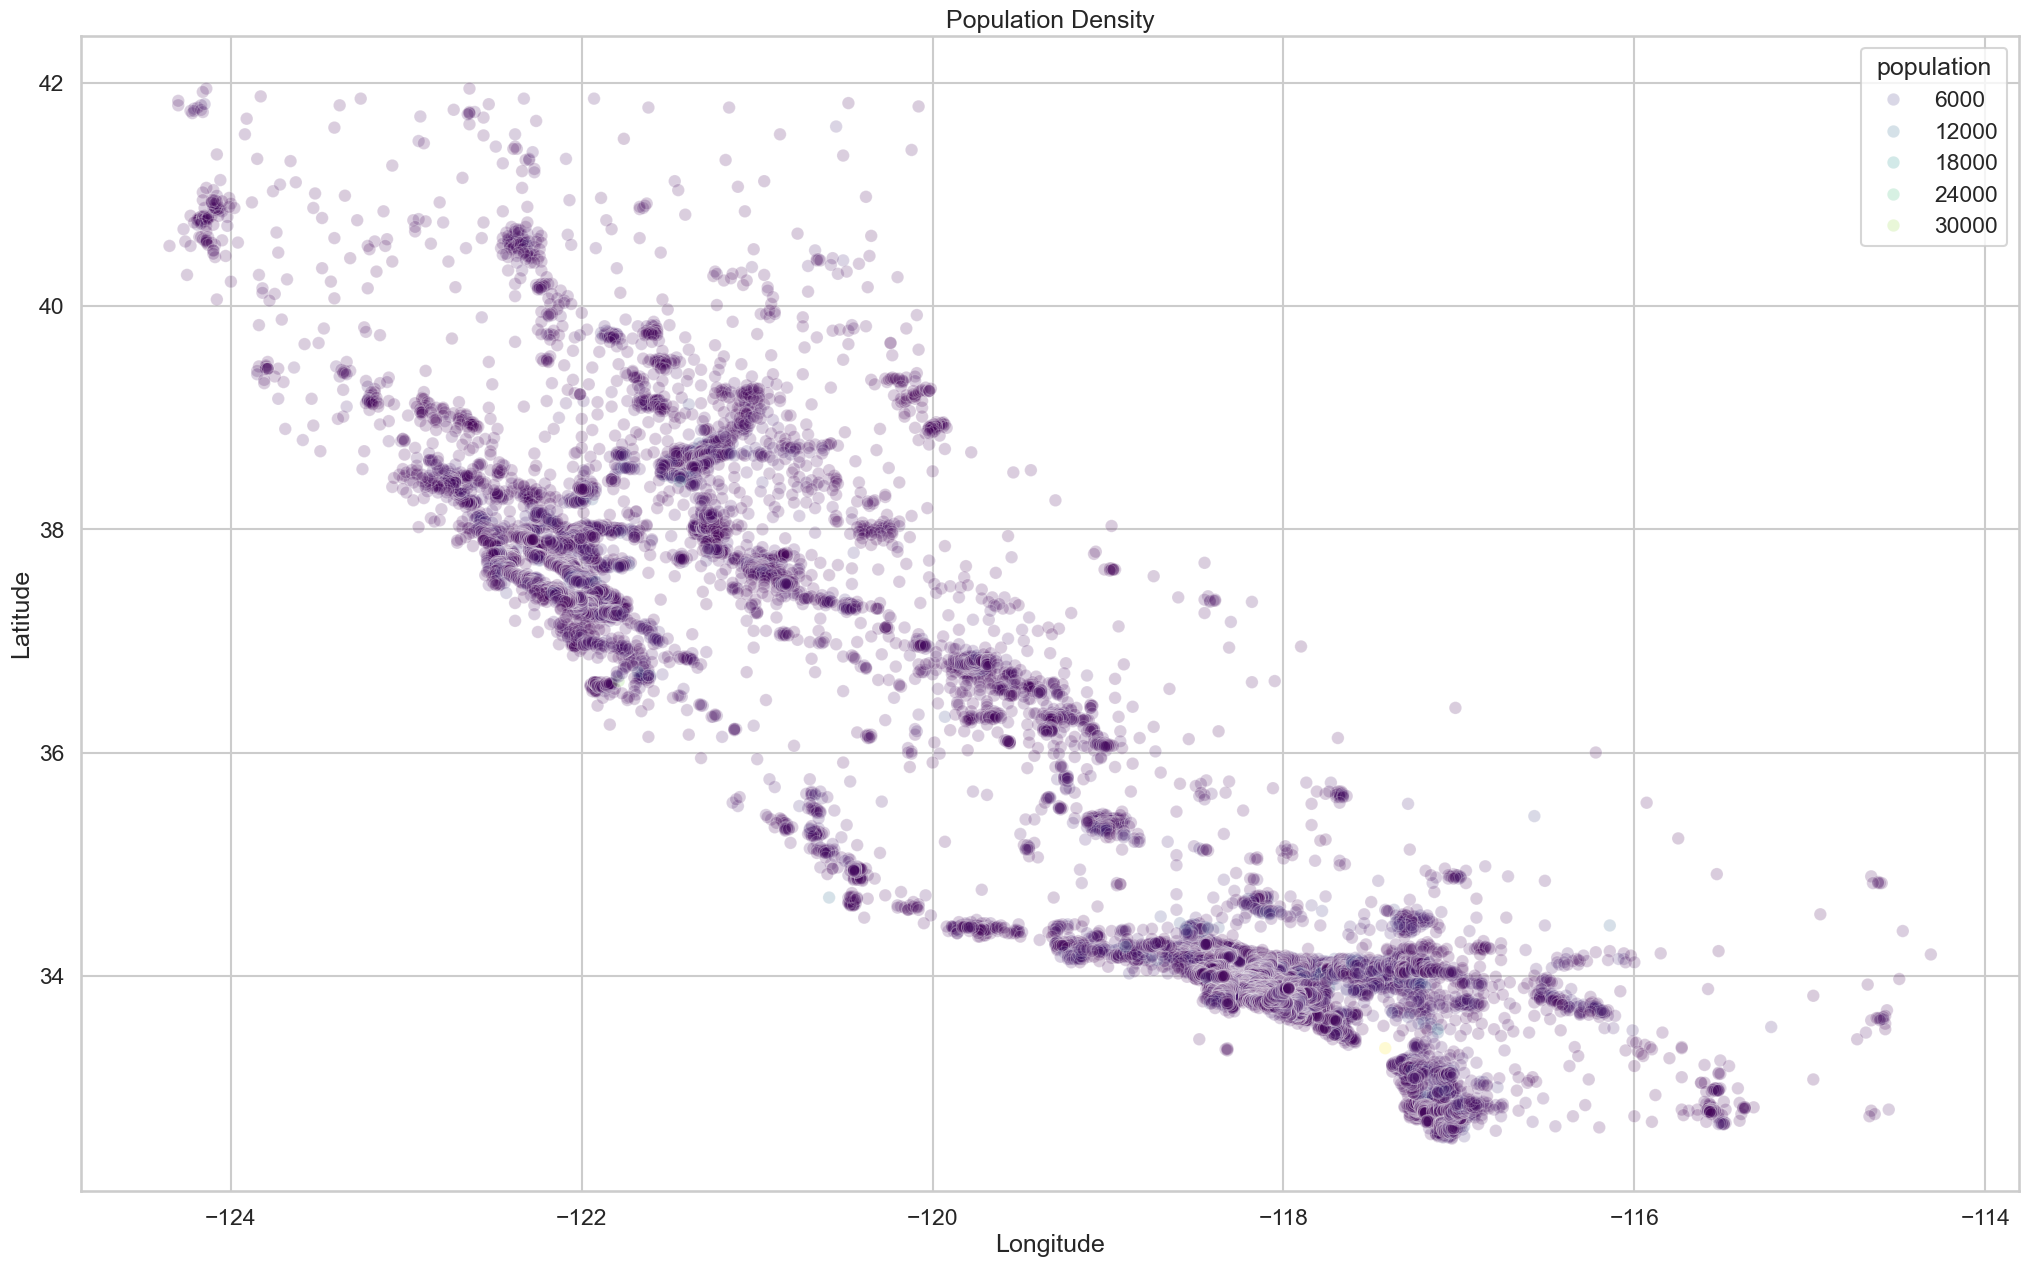

In [71]:
fig, axes = plt.subplots(1, 1, figsize=(25, 15))

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude", 
    hue="population", 
    alpha=0.2, 
    palette=palette, 
    ax=axes  
)

axes.set_title("Population Density")
axes.set_xlabel("Longitude")
axes.set_ylabel("Latitude")

plt.show()


Luego generamos un gráfico de dispersión geográfico entre longitude y latitude, coloreado por population, para analizar la distribución espacial y la concentración demográfica. El gráfico permite identificar clusters poblacionales en zonas costeras y metropolitanas, lo que sugiere que el efecto de la localización sobre el precio puede ser significativo y posiblemente no lineal. 

A partir del gráfico se observa que la población se distribuye de manera más intensa a lo largo del eje de la costa (el sur) y disminuye progresivamente hacia el interior y hacia el extremo noreste

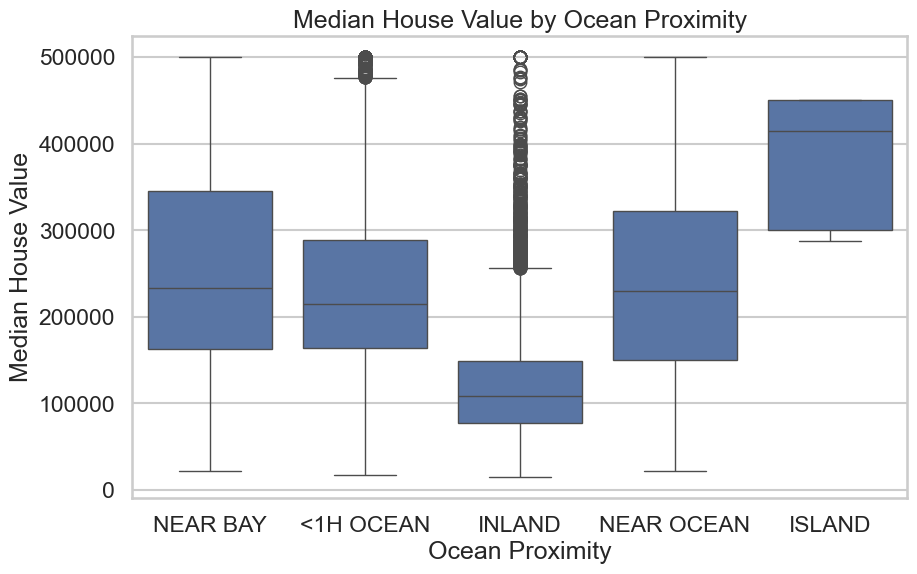

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="ocean_proximity", y="median_house_value")
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()

A continuación, analizamos la variable categórica ocean_proximity mediante un boxplot frente a median_house_value. 


Se observan variaciones claras entre zonas costeras e interiores, lo que refuerza la hipótesis de que la proximidad al océano influye de manera relevante en la valoración inmobiliaria.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[alertas].dropna()

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Análisis de Multicolinealidad")
print("Variance Inflation Factor (VIF) para predictores alerta:\n")
print(vif_data)


Análisis de Multicolinealidad
Variance Inflation Factor (VIF) para predictores alerta:

              Feature        VIF
0       median_income   9.952955
1         total_rooms  23.666781
2      total_bedrooms  84.568772
3          population  15.974793
4          households  91.793274
5  median_house_value   8.908158


Finalmente, calculamos el Variance Inflation Factor (VIF) sobre las variables de alerta para cuantificar formalmente la multicolinealidad detectada previamente. 

Los valores elevados en variables relacionadas con escala demográfica confirman dependencia estructural, lo que sugiere la necesidad de considerar transformaciones, selección de variables o técnicas de regularización antes del modelado. Se puede notar que efectivamente el VIF es demasiado alto entre las variables de alerta.

### 4. Conclusiones



El análisis exploratorio muestra que varias variables relacionadas con el tamaño del distrito, como households, population, total_rooms y total_bedrooms, están altamente correlacionadas entre sí. Esto indica redundancia de información, lo cual se confirma con el análisis de multicolinealidad. Los valores de VIF son especialmente altos en total_bedrooms y households, lo que sugiere colinealidad severa que podría afectar la estabilidad de un modelo de regresión lineal. Por otro lado, median_income presenta una alta correlación con median_house_value y un VIF moderado, lo que confirma que es un predictor relevante. La correlación elevada entre latitude y longitude responde a la estructura geográfica del estado. Además, se detectó un 1% de valores faltantes en total_bedrooms, los cuales deben tratarse antes del modelado.

Como siguientes pasos, será necesario imputar los valores faltantes y reducir la multicolinealidad, ya sea eliminando variables redundantes o creando variables derivadas como proporciones por hogar. También se recomienda escalar las variables numéricas y comparar un modelo de regresión lineal base con versiones regularizadas. 